In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#CLEAN THE AIRBNB DATA
AirBnB_df = pd.read_csv('Resources/AB_US_2020.csv')

C:\Users\clayb\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Change New York City to New York
AirBnB_df = AirBnB_df.replace("New York City","New York")

#Change NaN for review_per_month to 0
AirBnB_df['reviews_per_month'] = AirBnB_df['reviews_per_month'].fillna(0)

In [4]:
#Add date column that states month-year to match city sales df headers
last_review = AirBnB_df.loc[:,'last_review']
AirBnB_df['last_review'] = AirBnB_df['last_review'].fillna('00/00/00')

new_dates_list = []
for date in last_review:
    if int(date[:2]) > 12:
        split_date = date.split('/')
        new_date = f'20{split_date[2]}-{split_date[1]}'
        new_dates_list.append(new_date)
        
    elif int(date[:2]) <= 12:
        split_date = date.split('/')
        new_date = f'20{split_date[2]}-{split_date[0]}'
        new_dates_list.append(new_date)

AirBnB_df['Month/Year'] = new_dates_list

new_dates_list

['2020-02',
 '2020-07',
 '2019-11',
 '2020-09',
 '2015-10',
 '2020-01',
 '2019-11',
 '2019-10',
 '2020-05',
 '2019-06',
 '2019-03',
 '2020-03',
 '2020-08',
 '2020-09',
 '2020-09',
 '2020-09',
 '2020-02',
 '2020-02',
 '2019-11',
 '2020-10',
 '2019-01',
 '2020-09',
 '2020-08',
 '2020-09',
 '2020-08',
 '2020-07',
 '2020-09',
 '2018-10',
 '2020-08',
 '2020-07',
 '2020-09',
 '2020-12',
 '2020-09',
 '2020-09',
 '2020-09',
 '2020-08',
 '2020-11',
 '2019-05',
 '2020-03',
 '2020-09',
 '2020-06',
 '2020-09',
 '2020-08',
 '2020-02',
 '2020-08',
 '2020-03',
 '2020-06',
 '2020-12',
 '2020-02',
 '2018-07',
 '2019-11',
 '2020-02',
 '2020-07',
 '2020-02',
 '2020-05',
 '2020-01',
 '2015-02',
 '2020-07',
 '2019-08',
 '2020-09',
 '2019-02',
 '2020-12',
 '2020-08',
 '2019-11',
 '2020-04',
 '2020-08',
 '2020-08',
 '2020-03',
 '2020-08',
 '2020-02',
 '2020-05',
 '2020-10',
 '2020-09',
 '2020-01',
 '2020-01',
 '2020-10',
 '2020-09',
 '2020-06',
 '2020-03',
 '2020-02',
 '2020-08',
 '2020-09',
 '2020-06',
 '20

In [5]:
# SALES CITY DATA
#Pull in Sales City data
sales_city_df = pd.read_csv('Resources/House_Sales_City.csv')

#Group Sales City Data and check duplicate cities (will have counts > 1)
grouped_df = sales_city_df.groupby('RegionName').count()

#Pull rows where values = 1 to get non-duplicate cities
sales_city_list = grouped_df[grouped_df['RegionID']==1].index

#Unique cities in the AirBnB data
thelist = AirBnB_df['city'].unique()

#Pull sales city data from cities in AirBnB data
clean_city_df = sales_city_df[sales_city_df['RegionName'].isin(sales_city_list)]
clean_city_df = clean_city_df[clean_city_df['RegionName'].isin(thelist)]

#Merge both data sets
merged_data = AirBnB_df.merge(clean_city_df, right_on = 'RegionName', left_on = 'city')

merged_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.651460,-82.627920,Private room,60,...,286600.0,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0,310900.0
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.597790,-82.555400,Entire home/apt,470,...,286600.0,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0,310900.0
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,75,...,286600.0,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0,310900.0
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.578640,-82.595780,Entire home/apt,90,...,286600.0,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0,310900.0
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.614420,-82.541270,Private room,125,...,286600.0,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0,310900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124204,43805501,"Modern Boutique Apt in S. Lake Union, Gym +Pet...",218805459,Eric,Cascade,South Lake Union,47.624490,-122.335400,Entire home/apt,109,...,699000.0,690700.0,690800.0,684800.0,697300.0,692100.0,701700.0,701400.0,705600.0,NaN
124205,43807087,Beautiful & Bright Downtown Studio,130366604,Logan,Downtown,Belltown,47.615020,-122.342490,Entire home/apt,119,...,699000.0,690700.0,690800.0,684800.0,697300.0,692100.0,701700.0,701400.0,705600.0,NaN
124206,43807576,3 BDRM/1.75 bath Top Queen Anne home@quiet street,7435040,Chengying,Queen Anne,West Queen Anne,47.639570,-122.360840,Entire home/apt,299,...,699000.0,690700.0,690800.0,684800.0,697300.0,692100.0,701700.0,701400.0,705600.0,NaN
124207,43807578,Perfect & Bright Downtown Studio,130366604,Logan,Downtown,Belltown,47.615070,-122.340490,Entire home/apt,119,...,699000.0,690700.0,690800.0,684800.0,697300.0,692100.0,701700.0,701400.0,705600.0,NaN


In [21]:
my_df = merged_data[['price', 'city', 'reviews_per_month', '2020-02']]
my_df

,price,city,reviews_per_month,2020-02
0,60,Asheville,1.14,309000.0
1,470,Asheville,1.03,309000.0
2,75,Asheville,0.81,309000.0
3,90,Asheville,2.39,309000.0
4,125,Asheville,0.52,309000.0
...,...,...,...,...
124204,109,Seattle,0.00,705600.0
124205,119,Seattle,0.00,705600.0
124206,299,Seattle,0.00,705600.0
124207,119,Seattle,0.00,705600.0


In [7]:
# Take AirBnB sum of reviews per month and group by city
reviews_per_month = merged_data.groupby('city')['reviews_per_month'].sum()
reviews_per_month

city
Asheville         5550.36
Boston            3787.76
Chicago           9188.90
Jersey City       2894.34
Los Angeles      36333.25
New Orleans      10047.80
New York         31045.83
Pacific Grove      318.04
San Diego        17206.46
San Francisco     7400.50
Seattle          10609.22
Name: reviews_per_month, dtype: float64

In [8]:
number_of_reviews = merged_data.groupby('city')['number_of_reviews'].sum()
number_of_reviews

city
Asheville         161983
Boston            126851
Chicago           273496
Jersey City        70037
Los Angeles      1113802
New Orleans       329407
New York         1032264
Pacific Grove      13437
San Diego         486335
San Francisco     319331
Seattle           366251
Name: number_of_reviews, dtype: int64

In [9]:
housing_prices = merged_data.groupby('city')['2020-02'].mean()
housing_prices

city
Asheville         309000.0
Boston            665400.0
Chicago           302900.0
Jersey City       517400.0
Los Angeles       760200.0
New Orleans       248100.0
New York          568300.0
Pacific Grove     971500.0
San Diego         619200.0
San Francisco    1364300.0
Seattle           705600.0
Name: 2020-02, dtype: float64

The r-squared is: 0.0008361680252518058


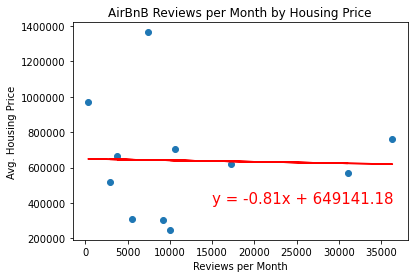

In [27]:
#reviews_per_month = merged_data.groupby('city')['reviews_per_month'].sum()
#housing_prices = merged_data.groupby('city')['2020-02'].mean()

x_values = reviews_per_month
y_values = housing_prices

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,400000),fontsize=15,color="red")

plt.xlabel('Reviews per Month')
plt.ylabel('Avg. Housing Price')
plt.ticklabel_format(style='plain')
plt.title('AirBnB Reviews per Month by Housing Price')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.0019126220197092567


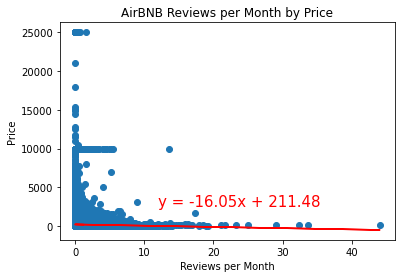

In [11]:
x_values = my_df['reviews_per_month']
y_values = my_df['price']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,2550),fontsize=15,color="red")

plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.title('AirBNB Reviews per Month by Price')
print(f"The r-squared is: {rvalue**2}")

# "There is a strong, negative, nonlinear association between the two variables."